<a href="https://colab.research.google.com/github/kaizen-abhinav/PDECODE/blob/main/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 2: 1D Wave Equation (The Advection Equation)

This experiment focuses on a hyperbolic PDE, which describes phenomena that propagate, like waves. We will solve the 1D Linear Advection Equation, a fundamental model for wave motion.

## Aim

To solve the one-dimensional wave equation using the Upwind Method and compare the numerical result with the initial condition.

## Objectives

1. To learn how to solve partial differential equations using numerical methods.
2. To understand and apply the Finite Difference Method for hyperbolic equations.
3. To observe how a wave profile moves with time.
4. To write and run a Python program for the simulation.

**Governing Equation:**

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

## The Upwind Method Algorithm:##

The “upwind” name comes from the fact that for a wave moving to the right (c > 0), we use information from the “upwind” direction (the left side, i-1) to determine the state at the next time step.
1. Discretize Domain: Set the number of space points (nx) and time steps (nt). Define the domain length (Lx) and total time (T). Calculate the step sizes $dx = \dfrac{Lx}{(nx - 1)}$

2. Check Stability (CFL Condition): Compute the Courant-Friedrichs-Lewy (CFL) number, $\lambda = c \frac{\Delta t}{\Delta x}$ .For the explicit upwind scheme to be stable, we must have
. This means the numerical wave speed (dx/dt) must be faster than the physical wave speed (c), so the calculation can “keep up” with the phenomenon.

3. Set Initial Condition: Define the initial shape of the wave, u(x, 0).

4. Time Marching Loop: For each time step n, iterate through all spatial points i and apply the upwind formula to find the wave’s new state u_new. The discretized formula is: $u_i^{n+1} = u_i^n - \lambda (u_i^n - u_{i-1}^n)$

5. Update: Set u = u_new.

6.Visualize: Plot the final wave profile against the initial one.

## Case Study: Exponential Decay Wave

Let’s simulate the equation $\frac{\partial u}{\partial t} + \frac{\partial u}{\partial x} = 0$  (so c=1) with the initial condition $u(x, 0) = e^{-x}$


CFL Number (lambda) = 0.6533


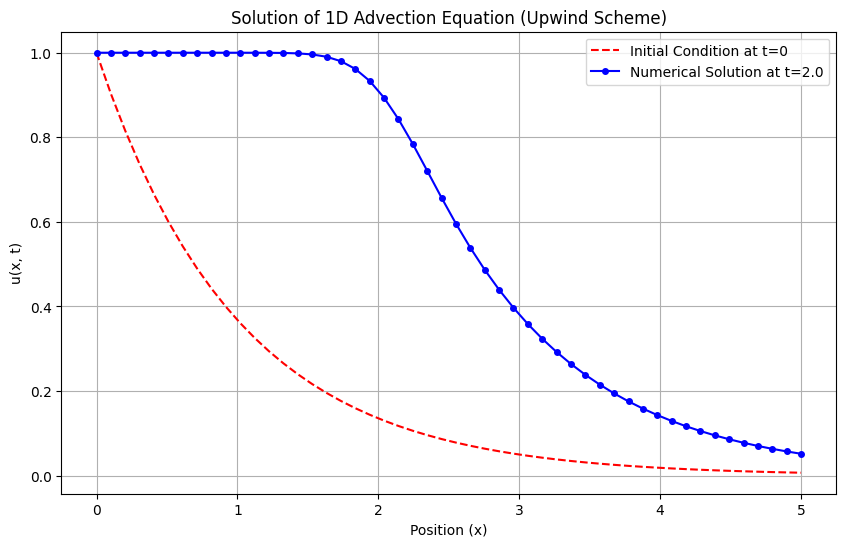

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Discretize Domain ---
nx = 50       # Number of spatial points
nt = 30       # Number of time steps
Lx = 5.0      # Domain length
T = 2.0       # Total time
dx = Lx / (nx - 1)  # Spatial step
dt = T / nt         # Time step

c = 1.0       # Wave speed

# --- 2. Check Stability ---
lambda_ = c * dt / dx
print(f"CFL Number (lambda) = {lambda_:.4f}")
if lambda_ > 1:
    print("Warning: CFL condition not met. The solution may be unstable!")

# --- 3. Set Initial Condition ---
x = np.linspace(0, Lx, nx)
u = np.exp(-x)  # u(x, 0) = e^(-x)
u_initial = u.copy() # Save the initial state for plotting

# --- 4. & 5. Time Marching Loop ---
for n in range(nt):
    u_old = u.copy()
    # Apply upwind formula to all interior points
    for i in range(1, nx):
        u[i] = u_old[i] - lambda_ * (u_old[i] - u_old[i-1])

# --- 6. Visualize ---
plt.figure(figsize=(10, 6))
plt.plot(x, u_initial, 'r--', label="Initial Condition at t=0")
plt.plot(x, u, 'b-', marker='o', markersize=4, label=f"Numerical Solution at t={T}")
plt.xlabel("Position (x)")
plt.ylabel("u(x, t)")
plt.legend()
plt.title("Solution of 1D Advection Equation (Upwind Scheme)")
plt.grid(True)
plt.show()

#**Result and Discussion**#
The numerical solution using the Upwind Method for the initial condition  $u(x,0)=e^{-x}$ shows the wave propagating to the right, as expected. The Courant number $\lambda=c\dfrac{dt}{dx}$ was maintained within the stability range $\lambda\leq 1$ , ensuring a stable and oscillation-free result. However, we can observe two key phenomena characteristic of this first-order scheme:

- Numerical Diffusion: The final wave shape is “smeared” or smoothed out compared to the initial condition. The sharp features are dampened. This is artificial damping introduced by the numerical method itself.

- Amplitude Decay: The peak of the wave seems to decrease slightly.

Despite these inaccuracies, the upwind scheme is computationally simple and robust, making it effective for simulating basic convection phenomena where the general transport behavior is more important than preserving the exact shape of the wave.

#**Application Problem: Stress Wave in a Rod**#
In mechanical systems, like long slender rods or beams, stress waves travel due to sudden loads or impacts. When a rod is struck at one end, a wave of stress and strain travels along its length. This can be modeled using the same 1D advection equation.

Task: Modify the code above to simulate a “square pulse” stress wave.

Governing Equation: $\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial t}=0$
Initial Condition: A square pulse representing a localized impact.
$u(x,0)=\begin{cases} 1&; 0.4\leq x\leq 0.6\\ 0&; \text{otherwise}\end{cases}$

Your Challenge:

- Copy the Python code block from the previous example.
- Change the line that sets the initial condition u to create the square pulse described above. Hint: You can use NumPy’s logical indexing. For example:` u[ (x >= 0.4) & (x <= 0.6) ] = 1.0.` You will need to initialize u as an array of zeros first: `u = np.zeros(nx)`.
- Re-run the simulation. Observe how the sharp corners of the square wave are smoothed out due to numerical diffusion.

#Solution to the Application Problem: Stress Wave in a Rod#
Here, we apply the same Upwind Method to the practical problem of a stress wave propagating through a mechanical rod. The initial condition is a square pulse, which could represent a short, sharp impact from a hammer strike on a specific section of the rod.

CFL Number (lambda) = 1.0000


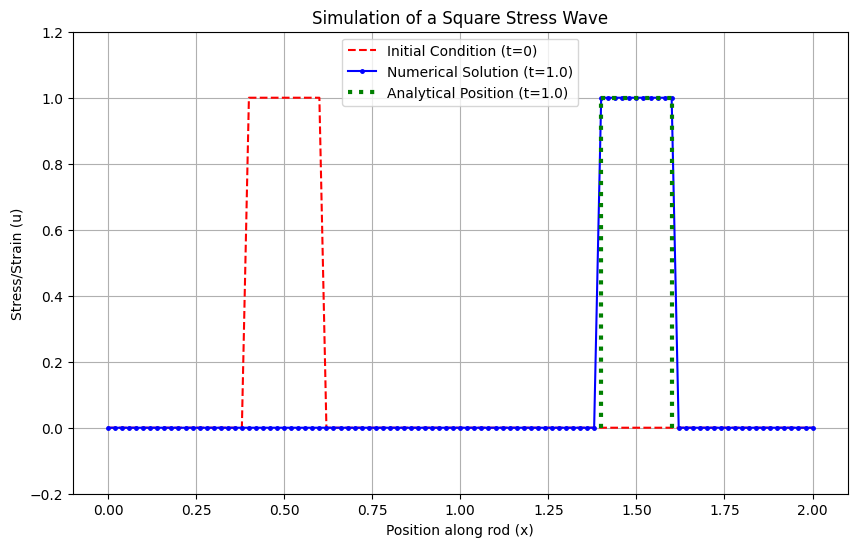

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Discretize Domain (same as before) ---
nx = 101      # Increased points for better resolution
nt = 50       # Increased time steps
Lx = 2.0      # Longer domain to see the wave travel
T = 1.0       # Total time
dx = Lx / (nx - 1)
dt = T / nt
c = 1.0       # Wave speed

# --- 2. Check Stability ---
lambda_ = c * dt / dx
print(f"CFL Number (lambda) = {lambda_:.4f}")
if lambda_ > 1:
    print("Warning: CFL condition not met. The solution may be unstable!")

# --- 3. Set Initial Condition: Square Pulse ---
x = np.linspace(0, Lx, nx)
# Initialize u as an array of zeros
u = np.zeros(nx)
# Set the pulse region to 1.0 using logical indexing
u[(x >= 0.4) & (x <= 0.6)] = 1.0

# Save the initial state for plotting
u_initial = u.copy()

# --- 4. & 5. Time Marching Loop (same as before) ---
for n in range(nt):
    u_old = u.copy()
    for i in range(1, nx):
        u[i] = u_old[i] - lambda_ * (u_old[i] - u_old[i-1])

# --- 6. Visualize ---
# Calculate the analytical solution's position for comparison
# The pulse should have moved by a distance of c*T
analytical_x_start = 0.4 + c * T
analytical_x_end = 0.6 + c * T

plt.figure(figsize=(10, 6))
plt.plot(x, u_initial, 'r--', label="Initial Condition (t=0)")
plt.plot(x, u, 'b-', marker='.', markersize=5, label=f"Numerical Solution (t={T})")

# Plot the theoretical "perfect" wave for comparison
plt.plot([analytical_x_start, analytical_x_end], [1, 1], 'g:', linewidth=3, label=f'Analytical Position (t={T})')
plt.plot([analytical_x_start, analytical_x_start], [0, 1], 'g:', linewidth=3)
plt.plot([analytical_x_end, analytical_x_end], [0, 1], 'g:', linewidth=3)


plt.xlabel("Position along rod (x)")
plt.ylabel("Stress/Strain (u)")
plt.ylim(-0.2, 1.2) # Set y-axis limits for better visualization
plt.legend()
plt.title("Simulation of a Square Stress Wave")
plt.grid(True)
plt.show()

# Discussion of the Square Pulse Result#
*Wave Propagation*: The primary success of the simulation is clearly visible: the pulse has moved to the right. The leading edge of the numerical solution is centered around the correct analytical position (x = 1.4 for the start of the pulse), confirming that the model correctly captures the fundamental advection behavior at speed c=1 over time T=1.

#Result#
The application simulation successfully models the physical propagation of a stress wave. However, it also serves as a crucial lesson in computational engineering: every numerical method has inherent errors and limitations. The Upwind Method, while stable and simple, introduces significant numerical diffusion that must be considered when interpreting the results.